# **IMPORT LIBRARIES**

In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# **DATA LOADING**

In [3]:
df = pd.read_csv('Bitcoin_tweets.csv')

In [4]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573250,Captain Crytpo,NaN,There's a new social order aligning. This is ...,2021-03-06 13:47:42,50.0,103.0,2086.0,False,2022-03-14 19:37:32,This should tell you plenty. DO NOT hold pape...,['BTC'],Twitter for Android,False
2573251,nadya,KİEV,BİTC0İN\n\nCAN U SEND GİFT PLS F0R WAR :(\n\nI...,2022-03-14 19:29:12,0.0,0.0,0.0,False,2022-03-14 19:37:32,TEwL3iCv1Xyn3Vr7C6CHMqdS36ixA6QWvc\n\ncan you ...,"['Bitcoin', 'bitcoins', 'BTC']",Twitter Web App,False
2573252,Crypto Cobra,NaN,OVER 100K FOLLOWERS ON TELEGRAM https://t.co/R...,2021-08-29 04:38:25,2105.0,68.0,34.0,False,2022-03-14 19:37:28,#TOP01 LOSSER LIST TODAY 14/03/22 📢\n\n#IMX/US...,"['TOP01', 'IMX', 'BTC', 'Binance', 'Coinbase',...",Twitter for iPhone,False
2573253,Cryptonia,NaN,🤖 #crypto #trading,2017-09-22 10:00:27,420.0,137.0,5568.0,False,2022-03-14 19:37:26,I am the only crazy person here? \n\n#btc #alts,"['btc', 'alts']",Twitter for iPhone,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573255 entries, 0 to 2573254
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_name         object 
 1   user_location     object 
 2   user_description  object 
 3   user_created      object 
 4   user_followers    float64
 5   user_friends      object 
 6   user_favourites   object 
 7   user_verified     object 
 8   date              object 
 9   text              object 
 10  hashtags          object 
 11  source            object 
 12  is_retweet        object 
dtypes: float64(1), object(12)
memory usage: 255.2+ MB


In [6]:
df.isnull().sum()

user_name                31
user_location       1261627
user_description     318865
user_created            178
user_followers          225
user_friends            225
user_favourites         225
user_verified           225
date                    225
text                    225
hashtags              17263
source                 3845
is_retweet              531
dtype: int64

In [7]:
#cleaning missing values
df_clean = df.dropna(subset=(['user_name', 
                                'user_created', 
                                'user_followers', 
                                'user_friends', 
                                'user_favourites', 
                                'user_verified', 
                                'date', 
                                'text', 
                                'source', 
                                'is_retweet']))
df_clean.reset_index(drop=True, inplace= True)

In [8]:
df_clean.isnull().sum()

user_name                 0
user_location       1259293
user_description     318671
user_created              0
user_followers            0
user_friends              0
user_favourites           0
user_verified             0
date                      0
text                      0
hashtags              15675
source                    0
is_retweet                0
dtype: int64

In [9]:
#mengubah kolom date menjadi dtype time

df_clean['date'] = pd.to_datetime(df_clean['date'])

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2569379 entries, 0 to 2569378
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   user_name         object        
 1   user_location     object        
 2   user_description  object        
 3   user_created      object        
 4   user_followers    float64       
 5   user_friends      object        
 6   user_favourites   object        
 7   user_verified     object        
 8   date              datetime64[ns]
 9   text              object        
 10  hashtags          object        
 11  source            object        
 12  is_retweet        object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 254.8+ MB


In [11]:
df_clean.date.sort_values(ascending=True)

21296     2021-02-05 10:52:04
21297     2021-02-05 10:52:04
21295     2021-02-05 10:52:06
21294     2021-02-05 10:52:07
21293     2021-02-05 10:52:26
                  ...        
2430585   2022-03-19 23:59:50
2430311   2022-03-19 23:59:50
2430584   2022-03-19 23:59:51
2430583   2022-03-19 23:59:54
2430582   2022-03-19 23:59:56
Name: date, Length: 2569379, dtype: datetime64[ns]

In [12]:
#membagi dua data set menjadi  verified account dan non verified account

ver_acc = df_clean[df_clean['user_verified'] == True]
nonver_acc = df_clean.query('user_verified == False or user_verified == "False"')

In [13]:
ver_acc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13281 entries, 63629 to 2568804
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_name         13281 non-null  object        
 1   user_location     11667 non-null  object        
 2   user_description  13257 non-null  object        
 3   user_created      13281 non-null  object        
 4   user_followers    13281 non-null  float64       
 5   user_friends      13281 non-null  object        
 6   user_favourites   13281 non-null  object        
 7   user_verified     13281 non-null  object        
 8   date              13281 non-null  datetime64[ns]
 9   text              13281 non-null  object        
 10  hashtags          13275 non-null  object        
 11  source            13281 non-null  object        
 12  is_retweet        13281 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 1.4+ MB


In [14]:
nonver_acc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2551809 entries, 0 to 2569378
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   user_name         object        
 1   user_location     object        
 2   user_description  object        
 3   user_created      object        
 4   user_followers    float64       
 5   user_friends      object        
 6   user_favourites   object        
 7   user_verified     object        
 8   date              datetime64[ns]
 9   text              object        
 10  hashtags          object        
 11  source            object        
 12  is_retweet        object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 272.6+ MB


In [15]:
# sampling data from nonver account

g = nonver_acc.groupby(nonver_acc['date'].dt.date).apply(lambda x: x['date'].sample(n=100,replace=True, random_state = 16)).to_numpy()
nonver_acc['random_sampling'] = np.where(nonver_acc.date.isin(g),'Yes','No')


In [16]:
nonver_acc = nonver_acc[(nonver_acc.random_sampling == 'Yes')]
nonver_acc

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,random_sampling
8,Mikcoin,NaN,"Technical Analyst | Trader\n\nNo certainty, on...",2020-11-26 23:45:46,104.0,41,238,False,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",Twitter Web App,False,Yes
24,Andrew,NaN,$TSLA #Bitcoin $Nio \nFormula One,2012-07-16 23:23:58,560.0,590,33782,False,2021-02-10 23:44:57,"The writing is on the wall, and you are ignori...","['bitcoin', 'BTC']",Twitter Web App,False,Yes
92,#Mailey,"Vancouver, BC",Lucky fool making decisions and money based on...,2020-11-03 19:10:23,314.0,182,8639,False,2021-02-10 23:10:58,@SimonDixonTwitt @YouTube @Tesla @elonmusk Gre...,NaN,Twitter Web App,False,Yes
128,btcbull47,NaN,Bullish on Bitcoin. Providing due diligence. T...,2020-12-23 13:01:48,320.0,16,5624,False,2021-02-10 22:58:18,Am I the only one who caught on to @PeterGWall...,NaN,Twitter for iPhone,False,Yes
147,Michael Ritchie,NaN,Just some guy,2020-08-26 02:27:44,41.0,149,3833,False,2021-02-10 22:51:25,Check out this #NFT for sale on Mintable! Pick...,['NFT'],Twitter Web App,False,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569262,Umair Khan,Pakistan,100% Follow Back in 24 hours,2020-11-22 16:47:39,3276.0,4862.0,4104.0,False,2022-03-14 19:46:02,This project will be very good. I am very opti...,"['Orijin', 'Polygon', 'IDO', 'BSC', 'Eth', 'BT...",Twitter Web App,False,Yes
2569263,Aaron.sfm,NaN,Even in chaos there is order.\n\n#NeuroEnthusi...,2016-12-18 22:22:52,1886.0,1696.0,15601.0,False,2022-03-14 19:46:02,#Crypto question: \n\nIs #BTC going to $34k (b...,"['Crypto', 'BTC']",Twitter Web App,False,Yes
2569272,Blackpanther,NaN,We have elected to put our money and faith in ...,2022-02-04 11:34:38,5.0,10.0,69.0,False,2022-03-14 19:45:35,@Fruitscoin_frts great day everyone! how is yo...,['btc'],Twitter Web App,False,Yes
2569330,Everything crypto,NaN,NaN,2015-12-20 13:49:51,517.0,2296.0,257.0,False,2022-03-14 19:40:54,"📢As our Society Fades, a New One Will Emerge\n...","['crypto', 'referral', 'earn', 'btc']",AutoTweet1976,False,Yes


In [17]:
nonver_acc.drop(columns='random_sampling', axis=1, inplace=True)

In [18]:
#concat ver and non ver dataset

data = pd.concat([ver_acc,nonver_acc])
data

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
63629,Daily Express,London,http://t.co/xNo7rgb8JJ - Home of the Daily and...,2008-12-05 12:05:48,879107.0,714.0,91.0,True,2021-04-07 12:03:04,Bitcoin price crash: Cryptocurrency plunges in...,"['Bitcoin', 'bitcoin', 'btc', 'Crypto']",TweetDeck,False
64000,BTCC,NaN,BTCC is the world-leading cryptocurrency deriv...,2014-02-11 11:35:46,81172.0,277.0,2830.0,True,2021-04-07 10:03:34,The #BTC is stuck inside a large range between...,"['BTC', 'Bitcoin', 'crypto']",Twitter Web App,False
64067,BtcTurk | PRO,NaN,Join over 3 million others from 7 continents. ...,2013-07-01 10:10:48,90749.0,10.0,1700.0,True,2021-04-07 09:42:48,Price data of #Bitcoin #BTC pairs on #btcturkp...,"['Bitcoin', 'BTC', 'btcturkpro']",Twitter Web App,False
64630,LatestLY,"Mumbai, India","https://t.co/U4rHOvEUQR focuses on the What, W...",2017-02-07 05:41:28,69095.0,344.0,124.0,True,2021-04-07 05:37:45,#WhatsApp rival #Signal reportedly testing pee...,"['WhatsApp', 'Signal', 'Cryptocurrency']",TweetDeck,False
64728,Herbert R. Sim,"London, England","PhD(c) #Economics #GeoPolitics #AI, MBA | VC...",2009-08-14 04:44:14,147300.0,142305.0,16909.0,True,2021-04-07 04:44:25,"When supply is more than demand, what happens?...",['Bitcoin'],Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569262,Umair Khan,Pakistan,100% Follow Back in 24 hours,2020-11-22 16:47:39,3276.0,4862.0,4104.0,False,2022-03-14 19:46:02,This project will be very good. I am very opti...,"['Orijin', 'Polygon', 'IDO', 'BSC', 'Eth', 'BT...",Twitter Web App,False
2569263,Aaron.sfm,NaN,Even in chaos there is order.\n\n#NeuroEnthusi...,2016-12-18 22:22:52,1886.0,1696.0,15601.0,False,2022-03-14 19:46:02,#Crypto question: \n\nIs #BTC going to $34k (b...,"['Crypto', 'BTC']",Twitter Web App,False
2569272,Blackpanther,NaN,We have elected to put our money and faith in ...,2022-02-04 11:34:38,5.0,10.0,69.0,False,2022-03-14 19:45:35,@Fruitscoin_frts great day everyone! how is yo...,['btc'],Twitter Web App,False
2569330,Everything crypto,NaN,NaN,2015-12-20 13:49:51,517.0,2296.0,257.0,False,2022-03-14 19:40:54,"📢As our Society Fades, a New One Will Emerge\n...","['crypto', 'referral', 'earn', 'btc']",AutoTweet1976,False


In [19]:
# data.to_csv('sampling_new_100.csv')

In [20]:
data.reset_index(drop=True,inplace=True)

In [21]:
data

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Daily Express,London,http://t.co/xNo7rgb8JJ - Home of the Daily and...,2008-12-05 12:05:48,879107.0,714.0,91.0,True,2021-04-07 12:03:04,Bitcoin price crash: Cryptocurrency plunges in...,"['Bitcoin', 'bitcoin', 'btc', 'Crypto']",TweetDeck,False
1,BTCC,NaN,BTCC is the world-leading cryptocurrency deriv...,2014-02-11 11:35:46,81172.0,277.0,2830.0,True,2021-04-07 10:03:34,The #BTC is stuck inside a large range between...,"['BTC', 'Bitcoin', 'crypto']",Twitter Web App,False
2,BtcTurk | PRO,NaN,Join over 3 million others from 7 continents. ...,2013-07-01 10:10:48,90749.0,10.0,1700.0,True,2021-04-07 09:42:48,Price data of #Bitcoin #BTC pairs on #btcturkp...,"['Bitcoin', 'BTC', 'btcturkpro']",Twitter Web App,False
3,LatestLY,"Mumbai, India","https://t.co/U4rHOvEUQR focuses on the What, W...",2017-02-07 05:41:28,69095.0,344.0,124.0,True,2021-04-07 05:37:45,#WhatsApp rival #Signal reportedly testing pee...,"['WhatsApp', 'Signal', 'Cryptocurrency']",TweetDeck,False
4,Herbert R. Sim,"London, England","PhD(c) #Economics #GeoPolitics #AI, MBA | VC...",2009-08-14 04:44:14,147300.0,142305.0,16909.0,True,2021-04-07 04:44:25,"When supply is more than demand, what happens?...",['Bitcoin'],Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31252,Umair Khan,Pakistan,100% Follow Back in 24 hours,2020-11-22 16:47:39,3276.0,4862.0,4104.0,False,2022-03-14 19:46:02,This project will be very good. I am very opti...,"['Orijin', 'Polygon', 'IDO', 'BSC', 'Eth', 'BT...",Twitter Web App,False
31253,Aaron.sfm,NaN,Even in chaos there is order.\n\n#NeuroEnthusi...,2016-12-18 22:22:52,1886.0,1696.0,15601.0,False,2022-03-14 19:46:02,#Crypto question: \n\nIs #BTC going to $34k (b...,"['Crypto', 'BTC']",Twitter Web App,False
31254,Blackpanther,NaN,We have elected to put our money and faith in ...,2022-02-04 11:34:38,5.0,10.0,69.0,False,2022-03-14 19:45:35,@Fruitscoin_frts great day everyone! how is yo...,['btc'],Twitter Web App,False
31255,Everything crypto,NaN,NaN,2015-12-20 13:49:51,517.0,2296.0,257.0,False,2022-03-14 19:40:54,"📢As our Society Fades, a New One Will Emerge\n...","['crypto', 'referral', 'earn', 'btc']",AutoTweet1976,False


## EXPLORATION DATA ANALYSIS

In [22]:
from langdetect import detect

In [23]:
#drop Invalid language and input valid language

invalid_text = []
valid_text = []

for i in data.index:
    try:
        a = detect(data.at[i,'text'])
        valid_text.append(a)
    except :
        invalid_text.append(i)

#drop invalid text by index
data = data.drop(index=invalid_text)
data

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Daily Express,London,http://t.co/xNo7rgb8JJ - Home of the Daily and...,2008-12-05 12:05:48,879107.0,714.0,91.0,True,2021-04-07 12:03:04,Bitcoin price crash: Cryptocurrency plunges in...,"['Bitcoin', 'bitcoin', 'btc', 'Crypto']",TweetDeck,False
1,BTCC,NaN,BTCC is the world-leading cryptocurrency deriv...,2014-02-11 11:35:46,81172.0,277.0,2830.0,True,2021-04-07 10:03:34,The #BTC is stuck inside a large range between...,"['BTC', 'Bitcoin', 'crypto']",Twitter Web App,False
2,BtcTurk | PRO,NaN,Join over 3 million others from 7 continents. ...,2013-07-01 10:10:48,90749.0,10.0,1700.0,True,2021-04-07 09:42:48,Price data of #Bitcoin #BTC pairs on #btcturkp...,"['Bitcoin', 'BTC', 'btcturkpro']",Twitter Web App,False
3,LatestLY,"Mumbai, India","https://t.co/U4rHOvEUQR focuses on the What, W...",2017-02-07 05:41:28,69095.0,344.0,124.0,True,2021-04-07 05:37:45,#WhatsApp rival #Signal reportedly testing pee...,"['WhatsApp', 'Signal', 'Cryptocurrency']",TweetDeck,False
4,Herbert R. Sim,"London, England","PhD(c) #Economics #GeoPolitics #AI, MBA | VC...",2009-08-14 04:44:14,147300.0,142305.0,16909.0,True,2021-04-07 04:44:25,"When supply is more than demand, what happens?...",['Bitcoin'],Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31252,Umair Khan,Pakistan,100% Follow Back in 24 hours,2020-11-22 16:47:39,3276.0,4862.0,4104.0,False,2022-03-14 19:46:02,This project will be very good. I am very opti...,"['Orijin', 'Polygon', 'IDO', 'BSC', 'Eth', 'BT...",Twitter Web App,False
31253,Aaron.sfm,NaN,Even in chaos there is order.\n\n#NeuroEnthusi...,2016-12-18 22:22:52,1886.0,1696.0,15601.0,False,2022-03-14 19:46:02,#Crypto question: \n\nIs #BTC going to $34k (b...,"['Crypto', 'BTC']",Twitter Web App,False
31254,Blackpanther,NaN,We have elected to put our money and faith in ...,2022-02-04 11:34:38,5.0,10.0,69.0,False,2022-03-14 19:45:35,@Fruitscoin_frts great day everyone! how is yo...,['btc'],Twitter Web App,False
31255,Everything crypto,NaN,NaN,2015-12-20 13:49:51,517.0,2296.0,257.0,False,2022-03-14 19:40:54,"📢As our Society Fades, a New One Will Emerge\n...","['crypto', 'referral', 'earn', 'btc']",AutoTweet1976,False


In [24]:
data['lang'] = valid_text
data

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,lang
0,Daily Express,London,http://t.co/xNo7rgb8JJ - Home of the Daily and...,2008-12-05 12:05:48,879107.0,714.0,91.0,True,2021-04-07 12:03:04,Bitcoin price crash: Cryptocurrency plunges in...,"['Bitcoin', 'bitcoin', 'btc', 'Crypto']",TweetDeck,False,en
1,BTCC,NaN,BTCC is the world-leading cryptocurrency deriv...,2014-02-11 11:35:46,81172.0,277.0,2830.0,True,2021-04-07 10:03:34,The #BTC is stuck inside a large range between...,"['BTC', 'Bitcoin', 'crypto']",Twitter Web App,False,en
2,BtcTurk | PRO,NaN,Join over 3 million others from 7 continents. ...,2013-07-01 10:10:48,90749.0,10.0,1700.0,True,2021-04-07 09:42:48,Price data of #Bitcoin #BTC pairs on #btcturkp...,"['Bitcoin', 'BTC', 'btcturkpro']",Twitter Web App,False,en
3,LatestLY,"Mumbai, India","https://t.co/U4rHOvEUQR focuses on the What, W...",2017-02-07 05:41:28,69095.0,344.0,124.0,True,2021-04-07 05:37:45,#WhatsApp rival #Signal reportedly testing pee...,"['WhatsApp', 'Signal', 'Cryptocurrency']",TweetDeck,False,en
4,Herbert R. Sim,"London, England","PhD(c) #Economics #GeoPolitics #AI, MBA | VC...",2009-08-14 04:44:14,147300.0,142305.0,16909.0,True,2021-04-07 04:44:25,"When supply is more than demand, what happens?...",['Bitcoin'],Twitter for Android,False,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31252,Umair Khan,Pakistan,100% Follow Back in 24 hours,2020-11-22 16:47:39,3276.0,4862.0,4104.0,False,2022-03-14 19:46:02,This project will be very good. I am very opti...,"['Orijin', 'Polygon', 'IDO', 'BSC', 'Eth', 'BT...",Twitter Web App,False,en
31253,Aaron.sfm,NaN,Even in chaos there is order.\n\n#NeuroEnthusi...,2016-12-18 22:22:52,1886.0,1696.0,15601.0,False,2022-03-14 19:46:02,#Crypto question: \n\nIs #BTC going to $34k (b...,"['Crypto', 'BTC']",Twitter Web App,False,en
31254,Blackpanther,NaN,We have elected to put our money and faith in ...,2022-02-04 11:34:38,5.0,10.0,69.0,False,2022-03-14 19:45:35,@Fruitscoin_frts great day everyone! how is yo...,['btc'],Twitter Web App,False,en
31255,Everything crypto,NaN,NaN,2015-12-20 13:49:51,517.0,2296.0,257.0,False,2022-03-14 19:40:54,"📢As our Society Fades, a New One Will Emerge\n...","['crypto', 'referral', 'earn', 'btc']",AutoTweet1976,False,en


In [25]:
datatwt = data.copy()

Total Language: 28


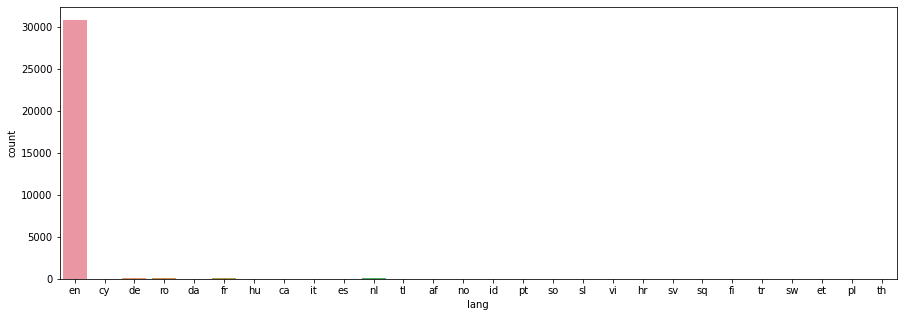

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(figsize=(15,5))

sns.countplot(x="lang", data=data, ax=ax);
print('Total Language:', data.lang.nunique())

In [27]:
data = data[(data.lang == 'en')]
data

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,lang
0,Daily Express,London,http://t.co/xNo7rgb8JJ - Home of the Daily and...,2008-12-05 12:05:48,879107.0,714.0,91.0,True,2021-04-07 12:03:04,Bitcoin price crash: Cryptocurrency plunges in...,"['Bitcoin', 'bitcoin', 'btc', 'Crypto']",TweetDeck,False,en
1,BTCC,NaN,BTCC is the world-leading cryptocurrency deriv...,2014-02-11 11:35:46,81172.0,277.0,2830.0,True,2021-04-07 10:03:34,The #BTC is stuck inside a large range between...,"['BTC', 'Bitcoin', 'crypto']",Twitter Web App,False,en
2,BtcTurk | PRO,NaN,Join over 3 million others from 7 continents. ...,2013-07-01 10:10:48,90749.0,10.0,1700.0,True,2021-04-07 09:42:48,Price data of #Bitcoin #BTC pairs on #btcturkp...,"['Bitcoin', 'BTC', 'btcturkpro']",Twitter Web App,False,en
3,LatestLY,"Mumbai, India","https://t.co/U4rHOvEUQR focuses on the What, W...",2017-02-07 05:41:28,69095.0,344.0,124.0,True,2021-04-07 05:37:45,#WhatsApp rival #Signal reportedly testing pee...,"['WhatsApp', 'Signal', 'Cryptocurrency']",TweetDeck,False,en
4,Herbert R. Sim,"London, England","PhD(c) #Economics #GeoPolitics #AI, MBA | VC...",2009-08-14 04:44:14,147300.0,142305.0,16909.0,True,2021-04-07 04:44:25,"When supply is more than demand, what happens?...",['Bitcoin'],Twitter for Android,False,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31252,Umair Khan,Pakistan,100% Follow Back in 24 hours,2020-11-22 16:47:39,3276.0,4862.0,4104.0,False,2022-03-14 19:46:02,This project will be very good. I am very opti...,"['Orijin', 'Polygon', 'IDO', 'BSC', 'Eth', 'BT...",Twitter Web App,False,en
31253,Aaron.sfm,NaN,Even in chaos there is order.\n\n#NeuroEnthusi...,2016-12-18 22:22:52,1886.0,1696.0,15601.0,False,2022-03-14 19:46:02,#Crypto question: \n\nIs #BTC going to $34k (b...,"['Crypto', 'BTC']",Twitter Web App,False,en
31254,Blackpanther,NaN,We have elected to put our money and faith in ...,2022-02-04 11:34:38,5.0,10.0,69.0,False,2022-03-14 19:45:35,@Fruitscoin_frts great day everyone! how is yo...,['btc'],Twitter Web App,False,en
31255,Everything crypto,NaN,NaN,2015-12-20 13:49:51,517.0,2296.0,257.0,False,2022-03-14 19:40:54,"📢As our Society Fades, a New One Will Emerge\n...","['crypto', 'referral', 'earn', 'btc']",AutoTweet1976,False,en


In [28]:
#select columns

data = data[["date",
            "text",
            "user_followers", 
            "user_verified", 
            ]]

In [29]:
data

,date,text,user_followers,user_verified
0,2021-04-07 12:03:04,Bitcoin price crash: Cryptocurrency plunges in...,879107.0,True
1,2021-04-07 10:03:34,The #BTC is stuck inside a large range between...,81172.0,True
2,2021-04-07 09:42:48,Price data of #Bitcoin #BTC pairs on #btcturkp...,90749.0,True
3,2021-04-07 05:37:45,#WhatsApp rival #Signal reportedly testing pee...,69095.0,True
4,2021-04-07 04:44:25,"When supply is more than demand, what happens?...",147300.0,True
...,...,...,...,...
31252,2022-03-14 19:46:02,This project will be very good. I am very opti...,3276.0,False
31253,2022-03-14 19:46:02,#Crypto question: \n\nIs #BTC going to $34k (b...,1886.0,False
31254,2022-03-14 19:45:35,@Fruitscoin_frts great day everyone! how is yo...,5.0,False
31255,2022-03-14 19:40:54,"📢As our Society Fades, a New One Will Emerge\n...",517.0,False


# CLEANING TEXT

In [30]:
import re

In [31]:
def demoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'',text)

def cleaning(text):
    text = demoji(text)
    text = re.sub(r'http\S+',' ', text)  #remove urls
    text = re.sub(r'@\w+',' ', text) #remove mentions
    text = re.sub(r'#\w+', ' ', text) #remove hashtag
    text = re.sub('[^A-Za-z\']+', ' ', text) #remove characters that not use in the english alphabets
    text = text.lower() #lower caps
    text = re.sub('\w*\d\w*','', text) #remove digit
    

    return text

In [32]:
data['cleaned_text'] = data['text'].apply(cleaning)
data

,date,text,user_followers,user_verified,cleaned_text
0,2021-04-07 12:03:04,Bitcoin price crash: Cryptocurrency plunges in...,879107.0,True,bitcoin price crash cryptocurrency plunges in ...
1,2021-04-07 10:03:34,The #BTC is stuck inside a large range between...,81172.0,True,the is stuck inside a large range between and ...
2,2021-04-07 09:42:48,Price data of #Bitcoin #BTC pairs on #btcturkp...,90749.0,True,price data of pairs on trade bitcoin and crypt...
3,2021-04-07 05:37:45,#WhatsApp rival #Signal reportedly testing pee...,69095.0,True,rival reportedly testing peer to peer payment...
4,2021-04-07 04:44:25,"When supply is more than demand, what happens?...",147300.0,True,when supply is more than demand what happens i...
...,...,...,...,...,...
31252,2022-03-14 19:46:02,This project will be very good. I am very opti...,3276.0,False,this project will be very good i am very optim...
31253,2022-03-14 19:46:02,#Crypto question: \n\nIs #BTC going to $34k (b...,1886.0,False,question is going to k bear market or go to k...
31254,2022-03-14 19:45:35,@Fruitscoin_frts great day everyone! how is yo...,5.0,False,great day everyone how is your day what do yo...
31255,2022-03-14 19:40:54,"📢As our Society Fades, a New One Will Emerge\n...",517.0,False,as our society fades a new one will emerge cur...


# VADER

In [33]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [34]:
sid = SentimentIntensityAnalyzer()

In [35]:
data['vader'] = data['cleaned_text'].apply(lambda desc: sid.polarity_scores(desc))

In [36]:
data.head()

,date,text,user_followers,user_verified,cleaned_text,vader
0,2021-04-07 12:03:04,Bitcoin price crash: Cryptocurrency plunges in...,879107.0,True,bitcoin price crash cryptocurrency plunges in ...,"{'neg': 0.338, 'neu': 0.493, 'pos': 0.169, 'co..."
1,2021-04-07 10:03:34,The #BTC is stuck inside a large range between...,81172.0,True,the is stuck inside a large range between and ...,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp..."
2,2021-04-07 09:42:48,Price data of #Bitcoin #BTC pairs on #btcturkp...,90749.0,True,price data of pairs on trade bitcoin and crypt...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,2021-04-07 05:37:45,#WhatsApp rival #Signal reportedly testing pee...,69095.0,True,rival reportedly testing peer to peer payment...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2021-04-07 04:44:25,"When supply is more than demand, what happens?...",147300.0,True,when supply is more than demand what happens i...,"{'neg': 0.081, 'neu': 0.728, 'pos': 0.191, 'co..."


In [37]:
data['compound'] = data['vader'].apply(lambda score_dict: score_dict['compound'])
data.head()

,date,text,user_followers,user_verified,cleaned_text,vader,compound
0,2021-04-07 12:03:04,Bitcoin price crash: Cryptocurrency plunges in...,879107.0,True,bitcoin price crash cryptocurrency plunges in ...,"{'neg': 0.338, 'neu': 0.493, 'pos': 0.169, 'co...",-0.3400
1,2021-04-07 10:03:34,The #BTC is stuck inside a large range between...,81172.0,True,the is stuck inside a large range between and ...,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.2500
2,2021-04-07 09:42:48,Price data of #Bitcoin #BTC pairs on #btcturkp...,90749.0,True,price data of pairs on trade bitcoin and crypt...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,2021-04-07 05:37:45,#WhatsApp rival #Signal reportedly testing pee...,69095.0,True,rival reportedly testing peer to peer payment...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,2021-04-07 04:44:25,"When supply is more than demand, what happens?...",147300.0,True,when supply is more than demand what happens i...,"{'neg': 0.081, 'neu': 0.728, 'pos': 0.191, 'co...",0.5302


# TEXTBLOB

In [38]:
from nltk.sentiment.util import *
from textblob import TextBlob

In [39]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

data['polarity'] = data['cleaned_text'].apply(get_polarity)
data.head()

,date,text,user_followers,user_verified,cleaned_text,vader,compound,polarity
0,2021-04-07 12:03:04,Bitcoin price crash: Cryptocurrency plunges in...,879107.0,True,bitcoin price crash cryptocurrency plunges in ...,"{'neg': 0.338, 'neu': 0.493, 'pos': 0.169, 'co...",-0.3400,0.000000
1,2021-04-07 10:03:34,The #BTC is stuck inside a large range between...,81172.0,True,the is stuck inside a large range between and ...,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.2500,0.107143
2,2021-04-07 09:42:48,Price data of #Bitcoin #BTC pairs on #btcturkp...,90749.0,True,price data of pairs on trade bitcoin and crypt...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.100000
3,2021-04-07 05:37:45,#WhatsApp rival #Signal reportedly testing pee...,69095.0,True,rival reportedly testing peer to peer payment...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000000
4,2021-04-07 04:44:25,"When supply is more than demand, what happens?...",147300.0,True,when supply is more than demand what happens i...,"{'neg': 0.081, 'neu': 0.728, 'pos': 0.191, 'co...",0.5302,0.750000


# IMPACT SCORE

In [40]:
import math

In [41]:
def generate_impact_score(compound_tweet) : 
    coef_verified = 2 if compound_tweet.user_verified else 1
    log_follower = math.log10((compound_tweet.user_followers)+1)
    impact_score = coef_verified * (log_follower+1)
    return impact_score

data['impact_score_only'] = data.apply(generate_impact_score,axis=1)
data.head()

,date,text,user_followers,user_verified,cleaned_text,vader,compound,polarity,impact_score_only
0,2021-04-07 12:03:04,Bitcoin price crash: Cryptocurrency plunges in...,879107.0,True,bitcoin price crash cryptocurrency plunges in ...,"{'neg': 0.338, 'neu': 0.493, 'pos': 0.169, 'co...",-0.3400,0.000000,13.888084
1,2021-04-07 10:03:34,The #BTC is stuck inside a large range between...,81172.0,True,the is stuck inside a large range between and ...,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.2500,0.107143,11.818823
2,2021-04-07 09:42:48,Price data of #Bitcoin #BTC pairs on #btcturkp...,90749.0,True,price data of pairs on trade bitcoin and crypt...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.100000,11.915693
3,2021-04-07 05:37:45,#WhatsApp rival #Signal reportedly testing pee...,69095.0,True,rival reportedly testing peer to peer payment...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000000,11.678906
4,2021-04-07 04:44:25,"When supply is more than demand, what happens?...",147300.0,True,when supply is more than demand what happens i...,"{'neg': 0.081, 'neu': 0.728, 'pos': 0.191, 'co...",0.5302,0.750000,12.336411


In [42]:
def generate_impact_vad(compound_tweet) : 
    coef_verified = 2 if compound_tweet.user_verified else 1
    log_follower = math.log10((compound_tweet.user_followers)+1)
    impact_score = (coef_verified * (log_follower+1) * compound_tweet.compound)+0.1
    return impact_score

data['impact_score_var'] = data.apply(generate_impact_vad,axis=1)

In [43]:
data.head()

,date,text,user_followers,user_verified,cleaned_text,vader,compound,polarity,impact_score_only,impact_score_var
0,2021-04-07 12:03:04,Bitcoin price crash: Cryptocurrency plunges in...,879107.0,True,bitcoin price crash cryptocurrency plunges in ...,"{'neg': 0.338, 'neu': 0.493, 'pos': 0.169, 'co...",-0.3400,0.000000,13.888084,-4.621949
1,2021-04-07 10:03:34,The #BTC is stuck inside a large range between...,81172.0,True,the is stuck inside a large range between and ...,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.2500,0.107143,11.818823,-2.854706
2,2021-04-07 09:42:48,Price data of #Bitcoin #BTC pairs on #btcturkp...,90749.0,True,price data of pairs on trade bitcoin and crypt...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.100000,11.915693,0.100000
3,2021-04-07 05:37:45,#WhatsApp rival #Signal reportedly testing pee...,69095.0,True,rival reportedly testing peer to peer payment...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000000,11.678906,0.100000
4,2021-04-07 04:44:25,"When supply is more than demand, what happens?...",147300.0,True,when supply is more than demand what happens i...,"{'neg': 0.081, 'neu': 0.728, 'pos': 0.191, 'co...",0.5302,0.750000,12.336411,6.640765


In [44]:
def generate_impact_tb(compound_tweet) : 
    coef_verified = 2 if compound_tweet.user_verified else 1
    log_follower = math.log10((compound_tweet.user_followers)+1)
    impact_score = coef_verified * (log_follower+1) * compound_tweet.polarity
    return impact_score

data['impact_score_tb'] = data.apply(generate_impact_tb,axis=1)
data.head()

,date,text,user_followers,user_verified,cleaned_text,vader,compound,polarity,impact_score_only,impact_score_var,impact_score_tb
0,2021-04-07 12:03:04,Bitcoin price crash: Cryptocurrency plunges in...,879107.0,True,bitcoin price crash cryptocurrency plunges in ...,"{'neg': 0.338, 'neu': 0.493, 'pos': 0.169, 'co...",-0.3400,0.000000,13.888084,-4.621949,0.000000
1,2021-04-07 10:03:34,The #BTC is stuck inside a large range between...,81172.0,True,the is stuck inside a large range between and ...,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.2500,0.107143,11.818823,-2.854706,1.266302
2,2021-04-07 09:42:48,Price data of #Bitcoin #BTC pairs on #btcturkp...,90749.0,True,price data of pairs on trade bitcoin and crypt...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.100000,11.915693,0.100000,1.191569
3,2021-04-07 05:37:45,#WhatsApp rival #Signal reportedly testing pee...,69095.0,True,rival reportedly testing peer to peer payment...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000000,11.678906,0.100000,0.000000
4,2021-04-07 04:44:25,"When supply is more than demand, what happens?...",147300.0,True,when supply is more than demand what happens i...,"{'neg': 0.081, 'neu': 0.728, 'pos': 0.191, 'co...",0.5302,0.750000,12.336411,6.640765,9.252309


In [45]:
data['impact_score_avg'] = data.groupby(data['date'].dt.date)['impact_score_only'].transform('mean')
data

,date,text,user_followers,user_verified,cleaned_text,vader,compound,polarity,impact_score_only,impact_score_var,impact_score_tb,impact_score_avg
0,2021-04-07 12:03:04,Bitcoin price crash: Cryptocurrency plunges in...,879107.0,True,bitcoin price crash cryptocurrency plunges in ...,"{'neg': 0.338, 'neu': 0.493, 'pos': 0.169, 'co...",-0.3400,0.000000,13.888084,-4.621949,0.000000,5.823700
1,2021-04-07 10:03:34,The #BTC is stuck inside a large range between...,81172.0,True,the is stuck inside a large range between and ...,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.2500,0.107143,11.818823,-2.854706,1.266302,5.823700
2,2021-04-07 09:42:48,Price data of #Bitcoin #BTC pairs on #btcturkp...,90749.0,True,price data of pairs on trade bitcoin and crypt...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.100000,11.915693,0.100000,1.191569,5.823700
3,2021-04-07 05:37:45,#WhatsApp rival #Signal reportedly testing pee...,69095.0,True,rival reportedly testing peer to peer payment...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000000,11.678906,0.100000,0.000000,5.823700
4,2021-04-07 04:44:25,"When supply is more than demand, what happens?...",147300.0,True,when supply is more than demand what happens i...,"{'neg': 0.081, 'neu': 0.728, 'pos': 0.191, 'co...",0.5302,0.750000,12.336411,6.640765,9.252309,5.823700
...,...,...,...,...,...,...,...,...,...,...,...,...
31252,2022-03-14 19:46:02,This project will be very good. I am very opti...,3276.0,False,this project will be very good i am very optim...,"{'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'comp...",0.8830,0.404500,4.515476,4.087166,1.826510,3.670674
31253,2022-03-14 19:46:02,#Crypto question: \n\nIs #BTC going to $34k (b...,1886.0,False,question is going to k bear market or go to k...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000000,4.275772,0.100000,0.000000,3.670674
31254,2022-03-14 19:45:35,@Fruitscoin_frts great day everyone! how is yo...,5.0,False,great day everyone how is your day what do yo...,"{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'comp...",0.6249,0.468182,1.778151,1.211167,0.832498,3.670674
31255,2022-03-14 19:40:54,"📢As our Society Fades, a New One Will Emerge\n...",517.0,False,as our society fades a new one will emerge cur...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.136364,3.714330,0.100000,0.506500,3.670674


In [46]:
data['impact_score_var_avg'] = data.groupby(data['date'].dt.date)['impact_score_var'].transform('mean')

In [47]:
data.head()

,date,text,user_followers,user_verified,cleaned_text,vader,compound,polarity,impact_score_only,impact_score_var,impact_score_tb,impact_score_avg,impact_score_var_avg
0,2021-04-07 12:03:04,Bitcoin price crash: Cryptocurrency plunges in...,879107.0,True,bitcoin price crash cryptocurrency plunges in ...,"{'neg': 0.338, 'neu': 0.493, 'pos': 0.169, 'co...",-0.3400,0.000000,13.888084,-4.621949,0.000000,5.8237,0.806072
1,2021-04-07 10:03:34,The #BTC is stuck inside a large range between...,81172.0,True,the is stuck inside a large range between and ...,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.2500,0.107143,11.818823,-2.854706,1.266302,5.8237,0.806072
2,2021-04-07 09:42:48,Price data of #Bitcoin #BTC pairs on #btcturkp...,90749.0,True,price data of pairs on trade bitcoin and crypt...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.100000,11.915693,0.100000,1.191569,5.8237,0.806072
3,2021-04-07 05:37:45,#WhatsApp rival #Signal reportedly testing pee...,69095.0,True,rival reportedly testing peer to peer payment...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000000,11.678906,0.100000,0.000000,5.8237,0.806072
4,2021-04-07 04:44:25,"When supply is more than demand, what happens?...",147300.0,True,when supply is more than demand what happens i...,"{'neg': 0.081, 'neu': 0.728, 'pos': 0.191, 'co...",0.5302,0.750000,12.336411,6.640765,9.252309,5.8237,0.806072


In [48]:
data['impact_score_tb_avg'] = data.groupby(data['date'].dt.date)['impact_score_tb'].transform('mean')
data.head()

,date,text,user_followers,user_verified,cleaned_text,vader,compound,polarity,impact_score_only,impact_score_var,impact_score_tb,impact_score_avg,impact_score_var_avg,impact_score_tb_avg
0,2021-04-07 12:03:04,Bitcoin price crash: Cryptocurrency plunges in...,879107.0,True,bitcoin price crash cryptocurrency plunges in ...,"{'neg': 0.338, 'neu': 0.493, 'pos': 0.169, 'co...",-0.3400,0.000000,13.888084,-4.621949,0.000000,5.8237,0.806072,0.556068
1,2021-04-07 10:03:34,The #BTC is stuck inside a large range between...,81172.0,True,the is stuck inside a large range between and ...,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.2500,0.107143,11.818823,-2.854706,1.266302,5.8237,0.806072,0.556068
2,2021-04-07 09:42:48,Price data of #Bitcoin #BTC pairs on #btcturkp...,90749.0,True,price data of pairs on trade bitcoin and crypt...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.100000,11.915693,0.100000,1.191569,5.8237,0.806072,0.556068
3,2021-04-07 05:37:45,#WhatsApp rival #Signal reportedly testing pee...,69095.0,True,rival reportedly testing peer to peer payment...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000000,11.678906,0.100000,0.000000,5.8237,0.806072,0.556068
4,2021-04-07 04:44:25,"When supply is more than demand, what happens?...",147300.0,True,when supply is more than demand what happens i...,"{'neg': 0.081, 'neu': 0.728, 'pos': 0.191, 'co...",0.5302,0.750000,12.336411,6.640765,9.252309,5.8237,0.806072,0.556068


In [49]:
# data.to_csv('dataset/sampling_impact_score_all.csv')

In [50]:
data.groupby(data['date'].dt.date)[['cleaned_text']].count()

,cleaned_text
date,
2021-02-05,98
2021-02-06,104
2021-02-07,115
2021-02-08,117
2021-02-09,103
...,...
2022-03-15,179
2022-03-16,198
2022-03-17,164


In [51]:
df_tests

NameError: name 'df_tests' is not defined

In [ ]:
data.describe()

,user_followers,compound,polarity,impact_score_only,impact_score_var,impact_score_tb,impact_score_avg,impact_score_var_avg,impact_score_tb_avg
count,1.047100e+04,10471.0,10471.000000,10471.000000,1.047100e+04,10471.000000,10471.000000,10471.000000,10471.000000
mean,2.031592e+05,0.0,0.041498,7.686317,1.000000e-01,0.353995,7.503154,1.534762,0.917753
std,8.147493e+05,0.0,0.142802,4.099121,1.387845e-17,1.321017,1.750119,0.642988,0.343621
min,0.000000e+00,0.0,-0.800000,1.000000,1.000000e-01,-8.858879,3.512403,0.026471,0.170701
25%,2.035000e+02,0.0,0.000000,3.769008,1.000000e-01,0.000000,6.499811,1.010111,0.660534
50%,3.158000e+03,0.0,0.000000,7.316023,1.000000e-01,0.000000,7.687809,1.559800,0.939619
75%,6.187150e+04,0.0,0.000000,11.492568,1.000000e-01,0.000000,8.833675,1.905919,1.147511
max,2.359728e+07,0.0,1.000000,16.745724,1.000000e-01,14.706169,10.199377,3.496367,1.751416


In [ ]:
df_test = data.query('impact_score_var_avg < 0.66')

In [ ]:
df_test.query('compound>0').shape

(907, 14)

In [ ]:
df_test.describe()

,user_followers,compound,polarity,impact_score_only,impact_score_var,impact_score_tb,impact_score_avg,impact_score_var_avg,impact_score_tb_avg
count,2.672000e+03,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000
mean,4.154935e+04,0.109232,0.091198,5.093347,0.528868,0.410635,5.093347,0.528868,0.410635
std,2.598712e+05,0.367487,0.228839,3.126752,2.267370,1.367971,1.256924,0.155504,0.166869
min,0.000000e+00,-0.933700,-1.000000,1.000000,-11.521494,-13.385511,3.606987,0.026471,0.170701
25%,5.200000e+01,0.000000,0.000000,3.089019,0.100000,0.000000,4.490468,0.513415,0.284135
50%,4.720000e+02,0.000000,0.000000,4.001301,0.100000,0.000000,4.627087,0.574297,0.383833
75%,3.633000e+03,0.361200,0.190764,5.656134,1.407434,0.694556,5.563432,0.642322,0.531526
max,7.368981e+06,0.987100,1.000000,15.734815,11.569720,11.671419,8.076785,0.687433,0.905371


(array([   7.,   36.,   25.,   72.,  311., 1845.,  277.,   59.,   26.,
          14.]),
 array([-11.52149392,  -9.2123725 ,  -6.90325107,  -4.59412965,
         -2.28500823,   0.02411319,   2.33323462,   4.64235604,
          6.95147746,   9.26059888,  11.56972031]),
 <BarContainer object of 10 artists>)

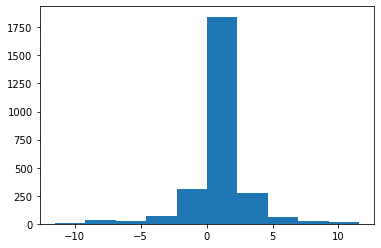

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df_test['impact_score_var'])

In [58]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler

scaler = MinMaxScaler()
scaler.fit(np.array(data_scale).reshape(-1,1))
data_scaled = scaler.fit_transform(np.array(data_scale).reshape(-1,1))

In [53]:
data_scale = data['impact_score_var']

In [59]:
with open("save_models/var_scale.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [293]:
data.query('impact_score_only == 0')

,date,text,user_followers,user_verified,cleaned_text,vader,compound,polarity,impact_score_only,impact_score_var,impact_score_tb,impact_score_avg,impact_score_var_avg,impact_score_tb_avg


In [294]:
daterange = pd.date_range("2020-10-01", "2021-11-01")

In [295]:
for single_date in daterange:
    print (single_date.strftime("%Y-%m-%d"))

2020-10-01
2020-10-02
2020-10-03
2020-10-04
2020-10-05
2020-10-06
2020-10-07
2020-10-08
2020-10-09
2020-10-10
2020-10-11
2020-10-12
2020-10-13
2020-10-14
2020-10-15
2020-10-16
2020-10-17
2020-10-18
2020-10-19
2020-10-20
2020-10-21
2020-10-22
2020-10-23
2020-10-24
2020-10-25
2020-10-26
2020-10-27
2020-10-28
2020-10-29
2020-10-30
2020-10-31
2020-11-01
2020-11-02
2020-11-03
2020-11-04
2020-11-05
2020-11-06
2020-11-07
2020-11-08
2020-11-09
2020-11-10
2020-11-11
2020-11-12
2020-11-13
2020-11-14
2020-11-15
2020-11-16
2020-11-17
2020-11-18
2020-11-19
2020-11-20
2020-11-21
2020-11-22
2020-11-23
2020-11-24
2020-11-25
2020-11-26
2020-11-27
2020-11-28
2020-11-29
2020-11-30
2020-12-01
2020-12-02
2020-12-03
2020-12-04
2020-12-05
2020-12-06
2020-12-07
2020-12-08
2020-12-09
2020-12-10
2020-12-11
2020-12-12
2020-12-13
2020-12-14
2020-12-15
2020-12-16
2020-12-17
2020-12-18
2020-12-19
2020-12-20
2020-12-21
2020-12-22
2020-12-23
2020-12-24
2020-12-25
2020-12-26
2020-12-27
2020-12-28
2020-12-29
2020-12-30